In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print(np.__version__)

import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    # Code that runs only on Kaggle
    print("Running on Kaggle")
    
else:
    # Code that runs elsewhere (like local Jupyter, Colab, etc.)
    print("Not running on Kaggle")

1.26.4
Running on Kaggle


In [3]:
#!pip install -Uqq fastai
!pip install -Uqq ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.3 MB/s eta 0:00:00


In [4]:
from fastcore.all import *
from ddgs import DDGS
from fastdownload import download_url
from fastai.vision.utils import download_images, resize_images
from fastai.vision.all import *
#import fastbook

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


In [5]:
search_images
#Arachnida, Crustacea, Insecta, Chilopoda, Diplopoda
ims = search_images('Chilopoda')
len(ims)

100

In [6]:
dest = 'images/Artho1.jpg'
download_url(ims[2], dest)

Path('images/Artho1.jpg')

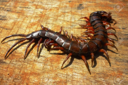

In [7]:
#!pwd
im = Image.open(dest)
im.to_thumb(128,128)

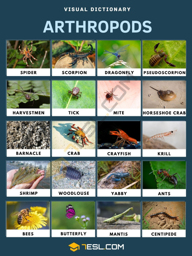

In [8]:
download_url(search_images('Arthropoda', max_images=10)[1], 'image.jpg', show_progress=False)
Image.open('image.jpg').to_thumb(256,256)

In [9]:
from pathlib import Path
import time

categories = ['Arachnida', 'Crustacea', 'Insecta', 'Chilopoda', 'Diplopoda']

path = Path('Arthropods')

if not path.exists():
    path.mkdir()
    for cat in categories:
        dest = (path/cat)
        dest.mkdir(exist_ok=True)
        results = search_images(f"{cat}", max_images=200)
        download_images(dest, urls=results)
        time.sleep(10)
        #resize_images(dest, max_size=400)

In [10]:
fns = get_image_files(path)
fns

(#441) [Path('Arthropods/Diplopoda/ec6d405b-fc71-4736-a1f6-db49eccd5542.jpg'),Path('Arthropods/Diplopoda/63b231ff-1f0c-45fa-a6eb-9264e9790146.jpg'),Path('Arthropods/Diplopoda/378aea86-09b2-4fdb-99f2-561f637258e7.jpg'),Path('Arthropods/Diplopoda/012ceeae-08d2-442d-8d34-7f151b0ab215.jpg'),Path('Arthropods/Diplopoda/63e1e274-2e1d-4169-9b97-55b4d59fa8c2.jpg'),Path('Arthropods/Diplopoda/96936abe-8e83-42bb-a5fa-86c606303df8.jpg'),Path('Arthropods/Diplopoda/bc2466b6-19c1-43e9-98d8-3006ac7c8379.jpg'),Path('Arthropods/Diplopoda/8daa93ea-e053-43ae-acba-2f6f3d5327c7.jpg'),Path('Arthropods/Diplopoda/fb2dff6d-82b4-4ea1-8932-0a84cc30080b.jpg'),Path('Arthropods/Diplopoda/b9e26702-6fd2-4b7f-b597-e162d91bf583.jpg'),Path('Arthropods/Diplopoda/42fb0769-fe43-48b3-8b12-a2bfd89c31ed.png'),Path('Arthropods/Diplopoda/133cfcb7-6b88-40ea-938f-576d9cef56a4.jpg'),Path('Arthropods/Diplopoda/6c3f5e51-17a5-42be-b66f-2ef40fc0f623.jpg'),Path('Arthropods/Diplopoda/d0b7e3aa-15be-4a95-9589-073c4970c273.jpg'),Path('Arthro

In [11]:
failed = verify_images(fns)
failed
failed.map(Path.unlink)

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


(#20) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]

In [12]:
Artho = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

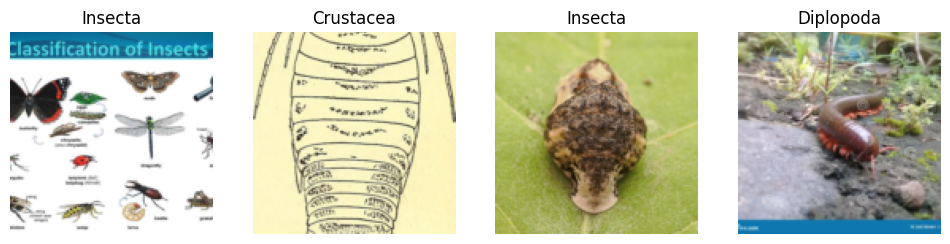

In [13]:
dls = Artho.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

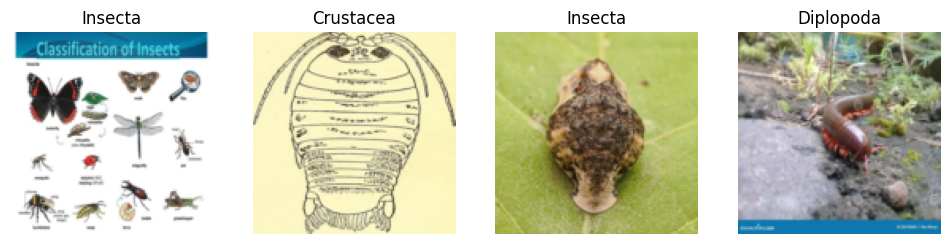

In [14]:
Artho = Artho.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Artho.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

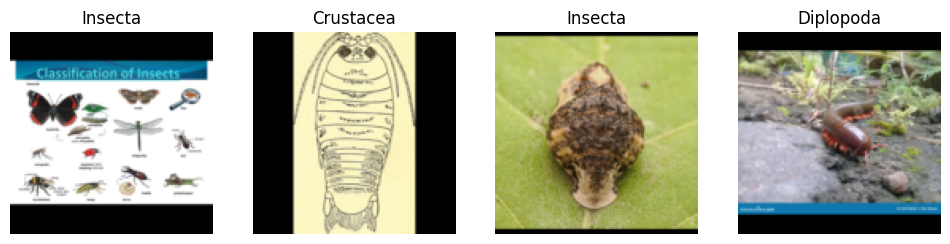

In [15]:
Artho = Artho.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = Artho.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

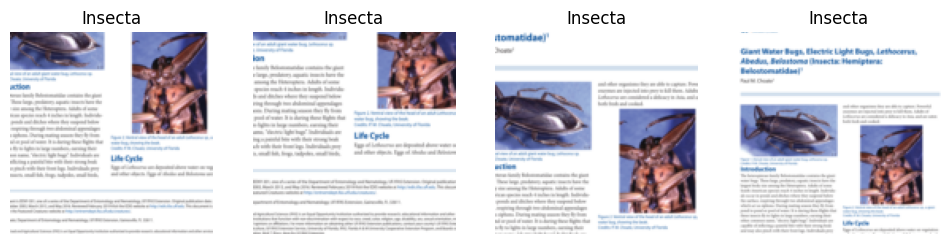

In [16]:
Artho = Artho.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Artho.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)
#Unique=True shows the cropped images of the same original image

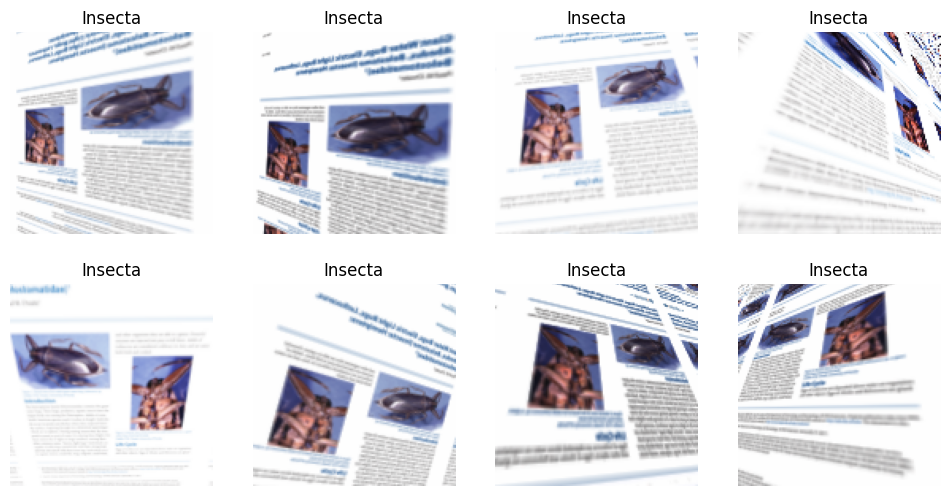

In [17]:
Artho = Artho.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = Artho.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

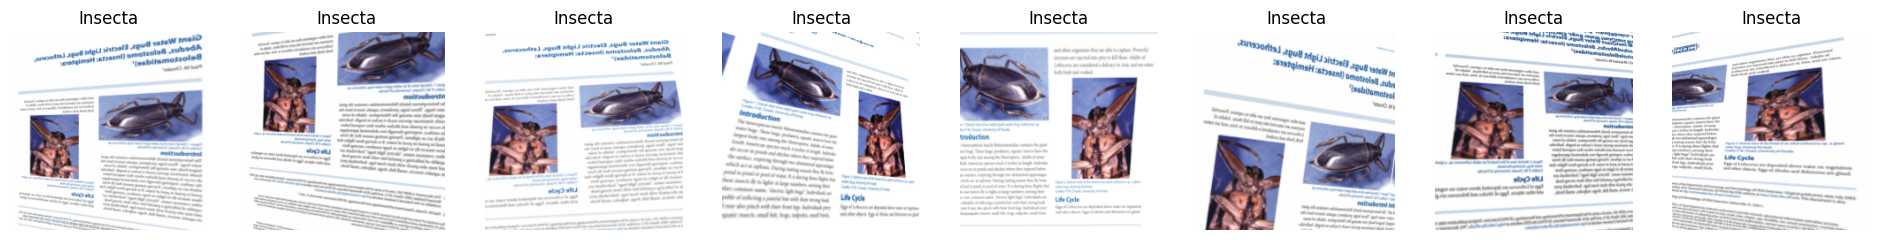

In [18]:
Artho = Artho.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = Artho.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 157MB/s]


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but o

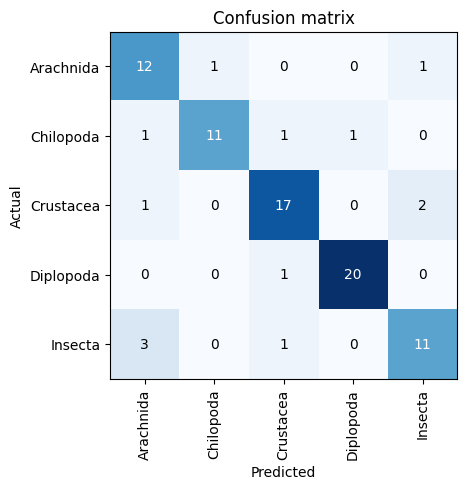

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

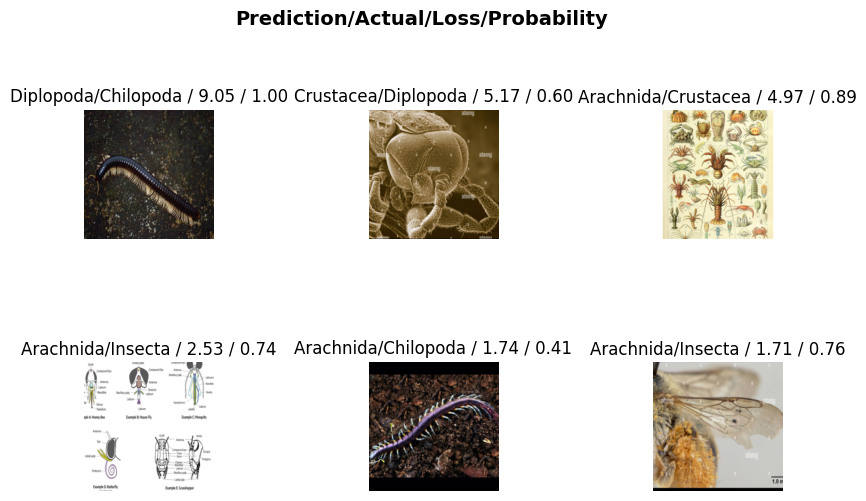

In [21]:
from matplotlib import pyplot as plt
interp.plot_top_losses(6, nrows=2)
plt.subplots_adjust(wspace=1.2)

In [22]:
#hide_output
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [23]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

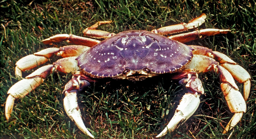

In [24]:
download_url(search_images('Arthopod', max_images=30)[15], 'random_picture.jpg', show_progress=False)
#download_url(search_images('box photos', max_images=50)[10], 'random_picture.jpg', show_progress=False)
Image.open('random_picture.jpg').to_thumb(256,256)

In [25]:
label, _, probs = learn.predict(PILImage.create('random_picture.jpg'))
#print(f"{fname} ➤ {label} ({probs.max():.2%})")
print(f"Prediction: {label}")
print(f"Probabilities: {probs}")

Prediction: Crustacea
Probabilities: tensor([9.7562e-02, 2.0384e-03, 8.9111e-01, 7.9612e-04, 8.4959e-03])
